In [1]:
# Install the following libraries
!pip install opencv-python
!pip install numpy
!pip install matplotlib

In [31]:

import cv2
img = cv2.imread("lena.jpg")
cv2.imshow("image", img)
cv2.waitKey(0)

-1

In [3]:
cv2.destroyAllWindows()

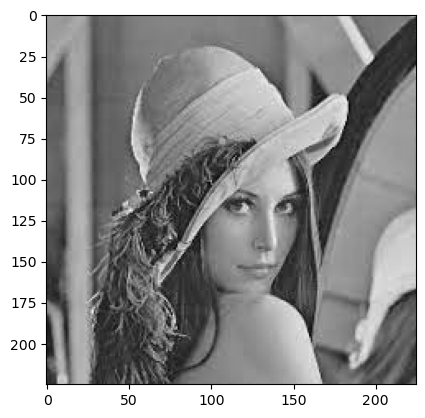

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#  img=cv2.imread("lena.jpg", cv2.IMREAD_GRAYSCALE)  #Read Grayscale Image
img=cv2.imread("lena.jpg", cv2.IMREAD_COLOR)  #Read COLOR Image
#Displaying image using plt.imshow() method
plt.imshow(img)

In [5]:
img.shape

(225, 225, 3)

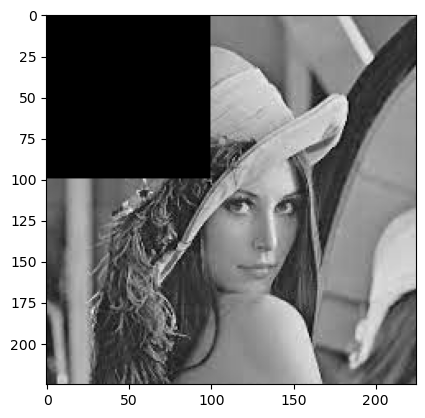

In [6]:
# Converting 100X100X3 pixels into Black
img1=np.array(img)
for i in range(0,100,1):
    for j in range (0,100,1):
        img1[i,j,:]=0
        
plt.imshow(img1)

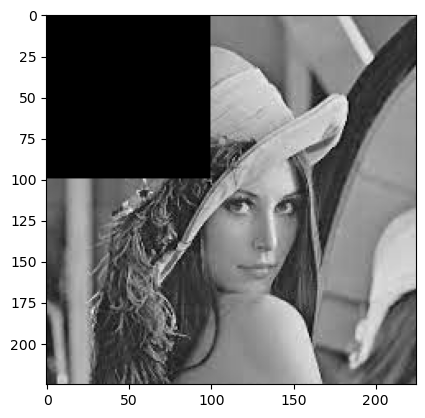

In [7]:
# Converting 100X100X3 pixels into Black
img2=img
img2[0:100,0:100,:]=0
plt.imshow(img2)

In [8]:
x,y,z=img.shape
x1,y1,z1=img1.shape

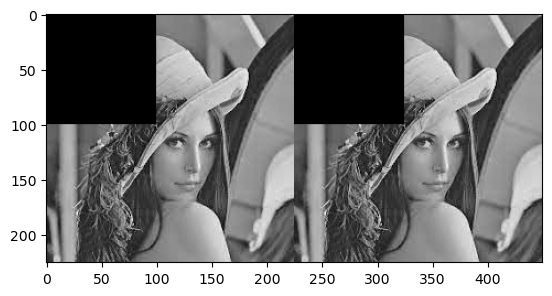

In [9]:
# Horizontally Stacking
img4=np.hstack((img,img1))
plt.imshow(img4)

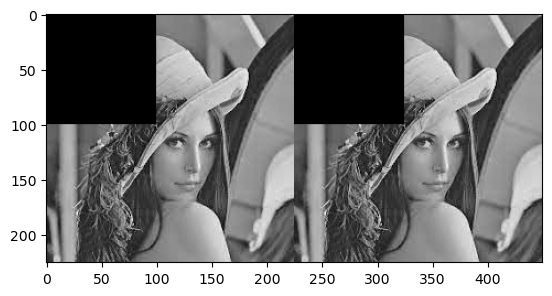

In [10]:
# Solution: Using slicing and hardcoding
img4=np.zeros((x,y+y1,z))
img4[0:x,0:y,:]=img[0:x,0:y,:]
img4[0:x,y:y+y1,:]=img1[0:x1,0:y1,:]
plt.imshow(img4.astype("uint8"))

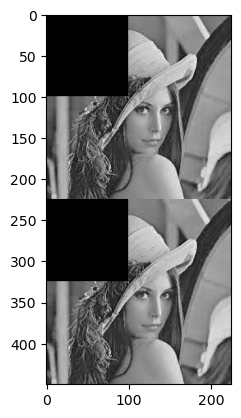

In [11]:
# Assignment: Do it by hardcoding using slicing
# Vertically Stacking
img5=np.vstack((img,img1))
plt.imshow(img5)

In [12]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image.shape

(225, 225)

### Python code that changes the colour value of the first 100X100 pixels of an image to black (0,0,0).

In [13]:
def change(img,n,m):
    for i in range(0,n,1):
        for j in range (0,m,1):
            img[i,j,:]=0
    return img


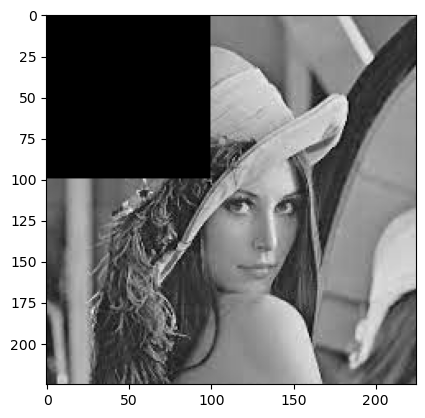

In [14]:
img3=change(img,100,100)
plt.imshow(img3)

In [32]:
def addStripRow(img, diff):
    x, _, _ = img.shape
    for i in range(0, x, diff*2):
        for j in range(i, i+diff):
            img[j,:,:] = 0
    
    plt.imshow(img)
    return img



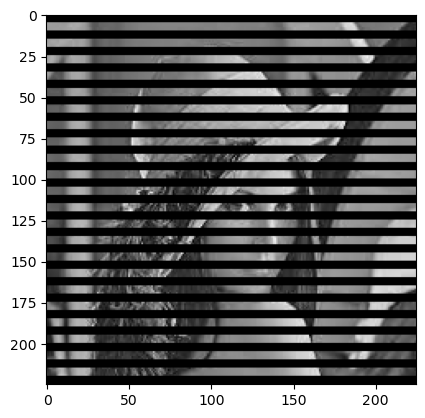

In [33]:
img4 = addStripRow(np.array(img), 5)

In [34]:
def addStripColumn(img, diff):
    _, y, _ = img.shape
    for i in range(0, y, diff*2):
        for j in range(i, i+diff):
            img[:,j,:] = 0
    
    plt.imshow(img)
    return img



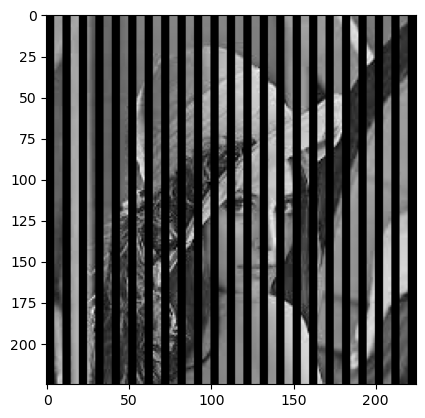

In [35]:
img5 = addStripColumn(np.array(img), 5)

In [36]:
def both_strip(img):
    img=addStripRow(np.array(img), 5)
    img=addStripColumn(np.array(img), 5)
    plt.imshow(img)
    return img

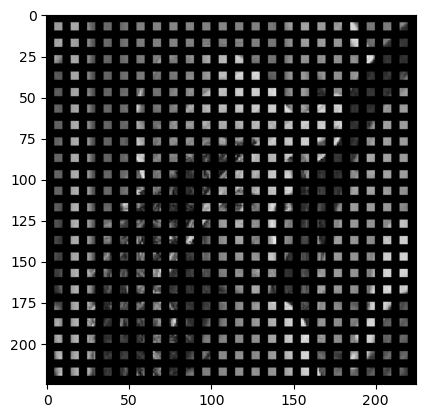

In [37]:
img6=both_strip(np.array(img))

### Program to combine two images side by side and display them using OpenCV.

In [38]:
def combine_images(img1, img2):
    height = max(img1.shape[0], img2.shape[0])
    img1 = cv2.resize(img1, (int(img1.shape[1] * height / img1.shape[0]), height))
    img2 = cv2.resize(img2, (int(img2.shape[1] * height / img2.shape[0]), height))
    combined_image = np.hstack((img1, img2))

    return combined_image

In [39]:
image = cv2.imread("testimg.jpg")

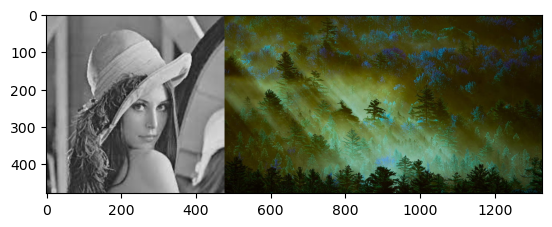

In [40]:
img7=combine_images(img,image)
plt.imshow(img7)

### OpenCV code to load an image, extract a specific image region, and display both the original and extracted regions using Python.

In [41]:
def extract_region(image, x, y, width, height):
    return image[y:y+height, x:x+width]

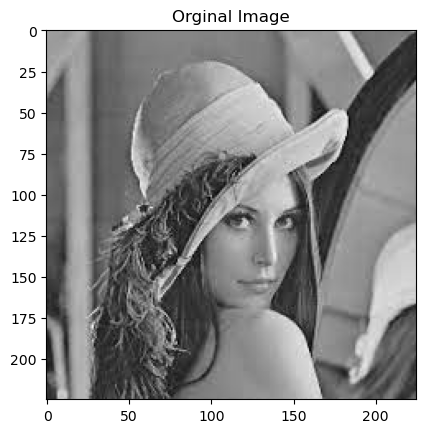

In [42]:
x, y, width, height = 100, 50, 200, 150
extracted_region = extract_region(img, x, y, width, height)
plt.title('Orginal Image')
plt.imshow(img)

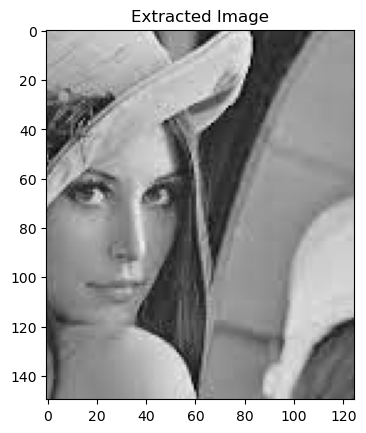

In [43]:
plt.title('Extracted Image')
plt.imshow(extracted_region)

### Python script that reads an image and calculates and plots the histogram of its grayscale version. Save the histogram plot as an image file

In [44]:
def plot_grayscale_histogram(image, title):
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    hist, bins = np.histogram(grayscale_image.flatten(), 256, [0, 256])

    plt.plot(hist, color='grey')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(True)
    plt.show()
    plt.savefig("histogram_plot.png")

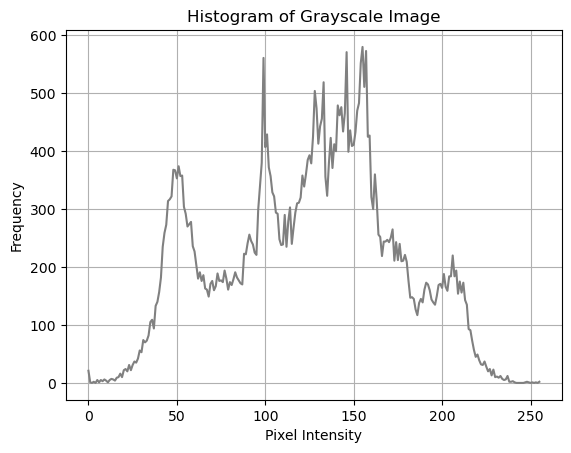

<Figure size 640x480 with 0 Axes>

In [45]:
plot_grayscale_histogram(img, title="Histogram of Grayscale Image")

### Program that reads an image and applies a Gaussian blur to it using the filter shown in the image below. Display both the original image and the blurred image. (To apply a filter, convolve the filter with the image)


In [46]:
def gaussian_blur(image):
    
    gaussian_filter = np.array([[1, 0, 1],
                                [0, 1, 0],
                                [1, 0, 1]])

    gaussian_filter = gaussian_filter / np.sum(gaussian_filter)
    blurred_image = cv2.filter2D(image, -1, gaussian_filter)

    return blurred_image

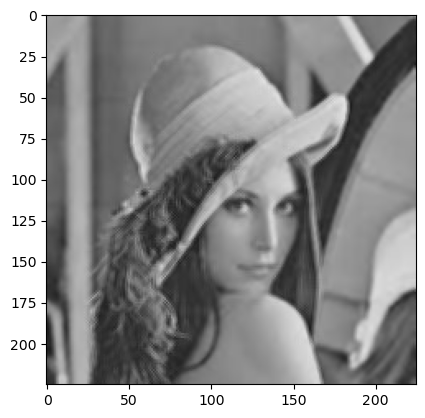

In [47]:
blur_img=gaussian_blur(img)
plt.imshow(blur_img)